<a href="https://colab.research.google.com/github/AdityaPrasadYarlagadda/Kdm-icp12/blob/main/icp12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler

Importing the data

In [70]:
apple_training_complete = pd.read_csv(r'/content/traindata.csv')
apple_testing_complete

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/25/2020,115.550003,116.750000,115.169998,116.029999,115.856873,76499200
1,11/27/2020,116.570000,117.489998,116.220001,116.589996,116.416031,46691300
2,11/30/2020,116.970001,120.970001,116.809998,119.050003,118.872368,169410200
3,12/1/2020,121.010002,123.470001,120.010002,122.720001,122.536896,128166800
4,12/2/2020,122.019997,123.370003,120.889999,123.080002,122.896355,89004200
...,...,...,...,...,...,...,...
98,4/20/2021,135.020004,135.529999,131.809998,133.110001,133.110001,94812300
99,4/21/2021,132.360001,133.750000,131.300003,133.500000,133.500000,68847100
100,4/22/2021,133.039993,134.149994,131.410004,131.940002,131.940002,84566500
101,4/23/2021,132.160004,135.119995,132.160004,134.320007,134.320007,78657500


As we deal with only opening price of the stock.we will filter all data from training set and have values only from open column

In [20]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

Data Normalization

In [21]:
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

Converting train data to right shape.
In this predict the opening stock price of the data based on the opening stock prices for the past 30 days.

In [55]:
features_set = []
labels = []
for i in range(30, 149):
    features_set.append(apple_training_scaled[i-30:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [56]:
features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

**Training the Lstm**

In this step Lstm and dropout layers are created.

In [58]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

We compile the model now

In [59]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Now we'll fit the model and let it train

In [60]:
model.fit(features_set, labels, epochs = 50, batch_size = 32)

Epoch 1/50
4/4 [==============================] - 7s 64ms/step - loss: 0.2993
Epoch 2/50
4/4 [==============================] - 0s 57ms/step - loss: 0.0524
Epoch 3/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0395
Epoch 4/50
4/4 [==============================] - 0s 69ms/step - loss: 0.0342
Epoch 5/50
4/4 [==============================] - 0s 68ms/step - loss: 0.0231
Epoch 6/50
4/4 [==============================] - 0s 66ms/step - loss: 0.0210
Epoch 7/50
4/4 [==============================] - 0s 59ms/step - loss: 0.0246
Epoch 8/50
4/4 [==============================] - 0s 64ms/step - loss: 0.0175
Epoch 9/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0167
Epoch 10/50
4/4 [==============================] - 0s 60ms/step - loss: 0.0154
Epoch 11/50
4/4 [==============================] - 0s 60ms/step - loss: 0.0141
Epoch 12/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0140
Epoch 13/50
4/4 [==============================] - 0s 63ms/st

Importing test data

In [61]:
apple_testing_complete = pd.read_csv(r'/content/testdata.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

Concatinating the train and test data

In [62]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

The input for each day should contain the opening stock prices for the previous 30 days. That means we need opening stock prices for the 20 test days and the 30 stock prices from the last 30 days for the training set.

In [64]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 30:].values

In [65]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

let's prepare our final test input set that will contain previous 30 stock prices

In [66]:
test_features = []
for i in range(30, 50):
    test_features.append(test_inputs[i-30:i, 0])

Finally, we need to convert our data into the three-dimensional format which can be used as input to the LSTM. 

In [67]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

Making Predictions

In [68]:
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

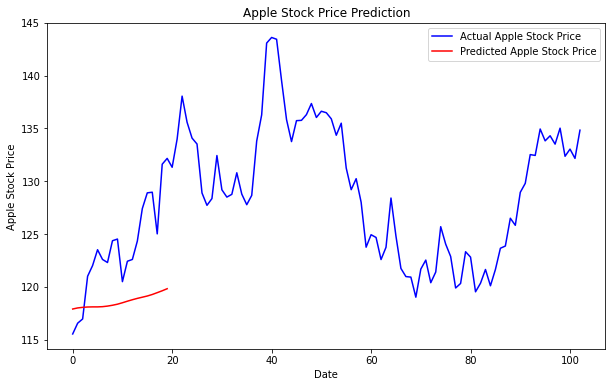

In [69]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()